In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cmasher as cmr
import functions as fn
import plotting_scripts as ps


## Clustering

In [2]:
# Parameters
n_points = 500
center = (0, 0)
clusters = [
    {'center': center, 'n_points': n_points, 'spread': 0.5},  # Tight
    {'center': center, 'n_points': n_points, 'spread': 1.5},  # Medium
    {'center': center, 'n_points': n_points, 'spread': 6}   # Very loose
]

bins = np.linspace(0, 2.0, 30)

# Generate clusters (same center, different spread)
points = [fn.generate_cluster(cl['center'], cl['n_points'], cl['spread'], seed=i)
          for i, cl in enumerate(clusters)]
spreads = [cl['spread'] for cl in clusters]  # for labeling

# Shared bounds for RR only
x_all = np.concatenate([x for x, y in points])
y_all = np.concatenate([y for x, y in points])
bounds = ((x_all.min(), x_all.max()), (y_all.min(), y_all.max()))


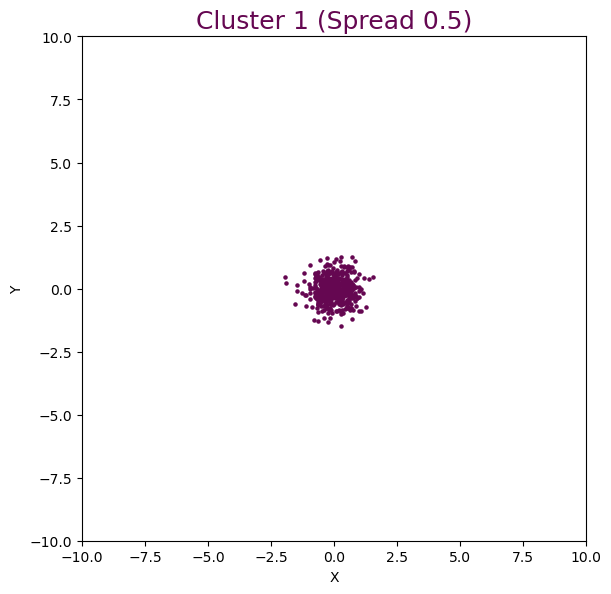

In [5]:
# Settings
xlim_fixed = (-10, 10)
ylim_fixed = (-10, 10)
colors = cmr.take_cmap_colors('cmr.pride_r', len(clusters), cmap_range=(0.1, 0.45), return_fmt='hex')
labelsize = 15

# Get the first cluster's points
x, y = points[0]
color = colors[0]

# Plot single scatter
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
ax.scatter(x, y, s=5, color=color)
ax.set_xlim(xlim_fixed)
ax.set_ylim(ylim_fixed)
ax.set_box_aspect(1)
ax.set_title(f"Cluster 1 (Spread {spreads[0]})", color=color, fontsize=labelsize+3)
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()


In [19]:
import numpy as np
import plotly.graph_objects as go
import cmasher as cmr
import functions as fn
import panel as pn

pn.extension('plotly')

# Parameters
n_points = 500
center = (0, 0)
xlim_fixed = (-10, 10)
ylim_fixed = (-10, 10)

def generate_plot(spread):
    x, y = fn.generate_cluster(center, n_points, spread, seed=42)
    color = cmr.take_cmap_colors('cmr.pride_r', 1, cmap_range=(0.1, 0.45), return_fmt='hex')[0]

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=x, y=y, mode='markers',
        marker=dict(size=5, color=color),
        name=f'Cluster (Spread {spread})'
    ))
    fig.update_layout(
        title=f'Cluster (Spread {spread})',
        xaxis_title='X', yaxis_title='Y',
        xaxis=dict(range=xlim_fixed, scaleanchor='y', scaleratio=1),
        yaxis=dict(range=ylim_fixed),
        width=600, height=600
    )
    return pn.pane.Plotly(fig, sizing_mode='stretch_width')

# Input widget and binding
spread_input = pn.widgets.FloatInput(name='Spread', value=0.5, step=0.1)
interactive_plot = pn.bind(generate_plot, spread=spread_input)

# Layout with input box and plot
dashboard = pn.Column(spread_input, interactive_plot)

# Save to standalone HTML with full interactivity
dashboard.save('htmls/interactive_cluster_panel.html', embed=True)


In [16]:
import numpy as np
import plotly.graph_objects as go
import cmasher as cmr
import functions as fn
import ipywidgets as widgets
from IPython.display import display

# Parameters
n_points = 500
center = (0, 0)
labelsize = 15
xlim_fixed = (-10, 10)
ylim_fixed = (-10, 10)

# Interactive widget for spread
spread_widget = widgets.FloatText(
    value=0.5,
    description='Spread:',
    step=0.1
)

def update_plot(spread_input):
    # Generate cluster with the chosen spread
    x, y = fn.generate_cluster(center, n_points, spread_input, seed=42)
    color = cmr.take_cmap_colors('cmr.pride_r', 1, cmap_range=(0.1, 0.45), return_fmt='hex')[0]

    # Create Plotly scatter plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='markers',
        marker=dict(size=5, color=color),
        name=f'Cluster (Spread {spread_input})'
    ))

    fig.update_layout(
        title=f'Cluster (Spread {spread_input})',
        xaxis_title='X',
        yaxis_title='Y',
        xaxis=dict(range=xlim_fixed, scaleanchor='y', scaleratio=1),
        yaxis=dict(range=ylim_fixed),
        width=600, height=600
    )
    fig.show()

# Display the widget and link to the function
widgets.interactive(update_plot, spread_input=spread_widget)


interactive(children=(FloatText(value=0.5, description='Spread:', step=0.1), Output()), _dom_classes=('widget-…

In [ ]:
import numpy as np
import plotly.graph_objects as go
import cmasher as cmr
import functions as fn
import ipywidgets as widgets
from IPython.display import display

# Parameters
n_points = 500
center = (0, 0)
labelsize = 15
xlim_fixed = (-10, 10)
ylim_fixed = (-10, 10)

# Interactive widget for spread
spread_widget = widgets.FloatText(
    value=0.5,
    description='Spread:',
    step=0.1
)

def update_plot(spread_input):
    x, y = fn.generate_cluster(center, n_points, spread_input, seed=42)
    color = cmr.take_cmap_colors('cmr.pride_r', 1, cmap_range=(0.1, 0.45), return_fmt='hex')[0]

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='markers',
        marker=dict(size=5, color=color),
        name=f'Cluster (Spread {spread_input})'
    ))

    fig.update_layout(
        title=f'Cluster (Spread {spread_input})',
        xaxis_title='X',
        yaxis_title='Y',
        xaxis=dict(range=xlim_fixed, scaleanchor='y', scaleratio=1),
        yaxis=dict(range=ylim_fixed),
        width=600, height=600
    )
    return fig

# Link the widget to the plotting function
interactive_output = widgets.interactive(update_plot, spread_input=spread_widget)

# Display the widget and output in the notebook
display(interactive_output)


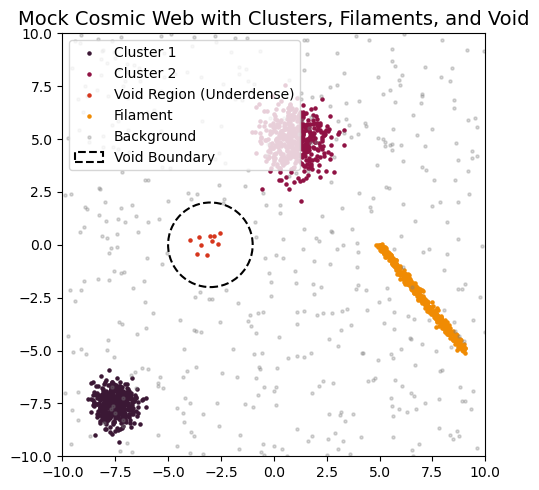

In [5]:
# --- Parameters ---
n_cluster = 500
n_void = 10  # sparse region = underdense "void"
n_background = 500
xlim, ylim = (-10, 10), (-10, 10)
void_center = (-3, 0)
void_radius = 2

# --- Clusters ---
cluster1 = fn.generate_cluster(center=(-7.5, -7.5), n_points=n_cluster, spread=0.5)
cluster2 = fn.generate_cluster(center=(1, 5), n_points=n_cluster, spread=0.8)

# --- Void (sparse cluster) ---
void = fn.generate_cluster(center=void_center, n_points=n_void, spread=0.5)

# --- Filaments ---
fil1 = fn.generate_filament(start=(5, 0), end=(9, -5), n_points=400, thickness=0.1)
fil2 = fn.generate_filament(start=(0, 4), end=(5, 4.5), n_points=200, thickness=0.15)

# --- Background (uniform + clipped by void) ---
bg = fn.generate_random_background(n_background, xlim=xlim, ylim=ylim)
bg = fn.mask_void_region(*bg, center=void_center, radius=void_radius)

# --- Colors ---
colors = cmr.take_cmap_colors('cmr.ember', 4, cmap_range=(0.2, 0.8), return_fmt='hex')

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

# Plot clusters
ax.scatter(*cluster1, s=5, color=colors[0], label="Cluster 1")
ax.scatter(*cluster2, s=5, color=colors[1], label="Cluster 2")

# Plot void (sparse cluster)
ax.scatter(*void, s=5, color=colors[2], label="Void Region (Underdense)")

# Plot filaments
ax.scatter(*fil1, s=5, color=colors[3], label="Filament")
#ax.scatter(*fil2, s=5, color=colors[3])

# Plot background
ax.scatter(*bg, s=5, color='gray', alpha=0.3, label="Background")

# Draw void outline
void_circle = Circle(void_center, void_radius, edgecolor='black',
                     facecolor='none', linestyle='--', linewidth=1.5, label="Void Boundary")
ax.add_patch(void_circle)

# Plot settings
ax.set_aspect('equal')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title("Mock Cosmic Web with Clusters, Filaments, and Void", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
plt.savefig(f"plots_output/mock_universe2.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


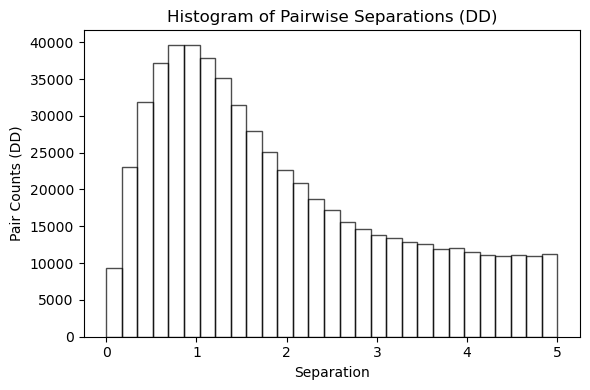

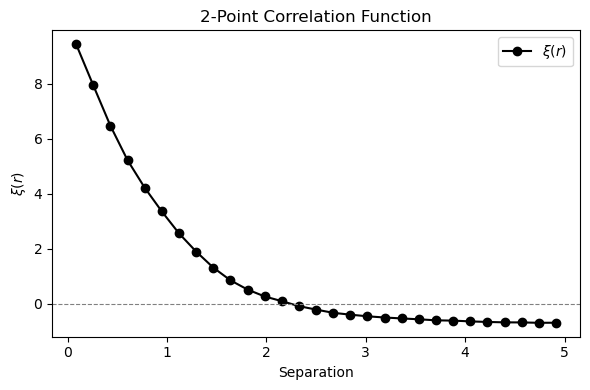

In [6]:
# --- Combine all components into one mock catalog ---
x_all_mock = np.concatenate([
    cluster1[0], cluster2[0], void[0], fil1[0], fil2[0], bg[0]
])
y_all_mock = np.concatenate([
    cluster1[1], cluster2[1], void[1], fil1[1], fil2[1], bg[1]
])

# --- Define separation bins ---
bins = np.linspace(0, 5, 30)  # Adjust bin range/size as needed

# Compute 2PCF and get pair histogram (DD)
r, dd_hist, xi = fn.compute_2pcf_and_xi(x_all_mock, y_all_mock, bins=bins, n_random=5000, bounds=(xlim, ylim))

# Plot DD pair counts
plt.figure(figsize=(6, 4))
plt.bar(r, dd_hist, width=np.diff(bins), align='center', color='royalblue', alpha=0.7, fill=False)
plt.xlabel("Separation")
plt.ylabel("Pair Counts (DD)")
plt.title("Histogram of Pairwise Separations (DD)")
plt.tight_layout()
plt.show()

# Plot xi(r)
plt.figure(figsize=(6, 4))
plt.plot(r, xi, marker='o', color='black', label=r"$\xi(r)$")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel("Separation")
plt.ylabel(r"$\xi(r)$")
plt.title("2-Point Correlation Function")
plt.legend()
plt.tight_layout()
plt.show()



## Shear

In [7]:
nonzero_shear = 2
shears = [(0.0, 0.0), (nonzero_shear, 1.5), (0.0, nonzero_shear*2)]  # Example shears

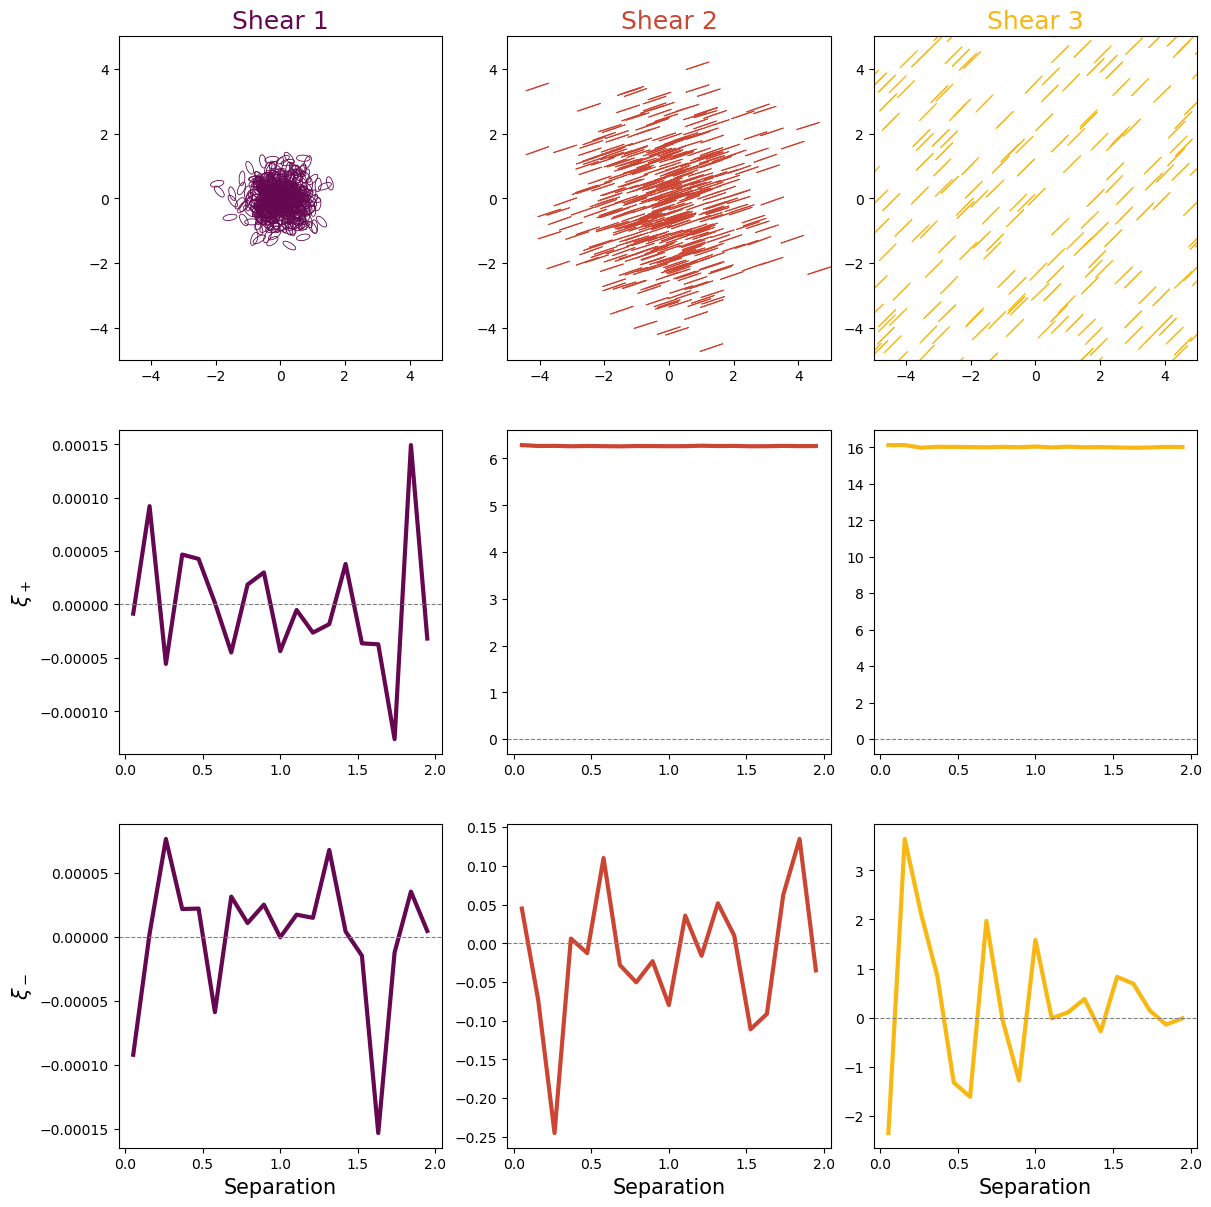

In [16]:
box_size = 5
xlim_fixed = (-box_size, box_size)
ylim_fixed = (-box_size, box_size)
bins = np.linspace(0, 2.0, 20)
colors = cmr.take_cmap_colors('cmr.pride_r', len(points), cmap_range=(0.1, 0.45), return_fmt='hex')
lw = 3
labelsize = 15
style = "ellipse"
scale = 0.2
stretch = 2

fig, axs = plt.subplots(3, 3, figsize=(12, 12),
                        constrained_layout=True,
                        gridspec_kw={'wspace': 0.01, 'hspace': 0.01})


for i, (x, y) in enumerate(points):
    color = colors[i]
    e1, e2 = fn.add_shapes(x, shear=shears[i])

    # Compute xi+, xi-
    r, etet, exex = fn.compute_tangential_and_cross(x, y, e1, e2)
    r_centers, xi_plus, xi_minus = fn.bin_2pcf(r, etet, exex, bins)

    # Top row: Shape field
    ps.plot_shapes(x, y, e1, e2, axs[0, i], style=style, scale=scale, color=color, stretch=stretch)
    axs[0, i].set_xlim(xlim_fixed)
    axs[0, i].set_ylim(ylim_fixed)
    axs[0, i].set_box_aspect(1)
    axs[0, i].set_title(f"Shear {i+1}", color=color, fontsize=labelsize + 3)

    # Middle row: xi+
    axs[1, i].plot(r_centers, xi_plus, color=color, lw=lw)
    axs[1, i].set_ylabel(r"$\xi_+$", fontsize=labelsize)
    axs[1, i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axs[1, i].set_box_aspect(1)

    # Bottom row: xi-
    axs[2, i].plot(r_centers, xi_minus, color=color, lw=lw)
    axs[2, i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axs[2, i].set_ylabel(r"$\xi_-$", fontsize=labelsize)
    axs[2, i].set_xlabel("Separation", fontsize=labelsize)
    axs[2, i].set_box_aspect(1)

    # Remove redundant labels for 2nd/3rd column
    if i > 0:
        axs[0, i].set_ylabel("")
        axs[1, i].set_ylabel("")
        axs[2, i].set_ylabel("")

plt.savefig(f"plots_output/xi_shear_configs_{style}.png", dpi=300, bbox_inches='tight')
plt.show()


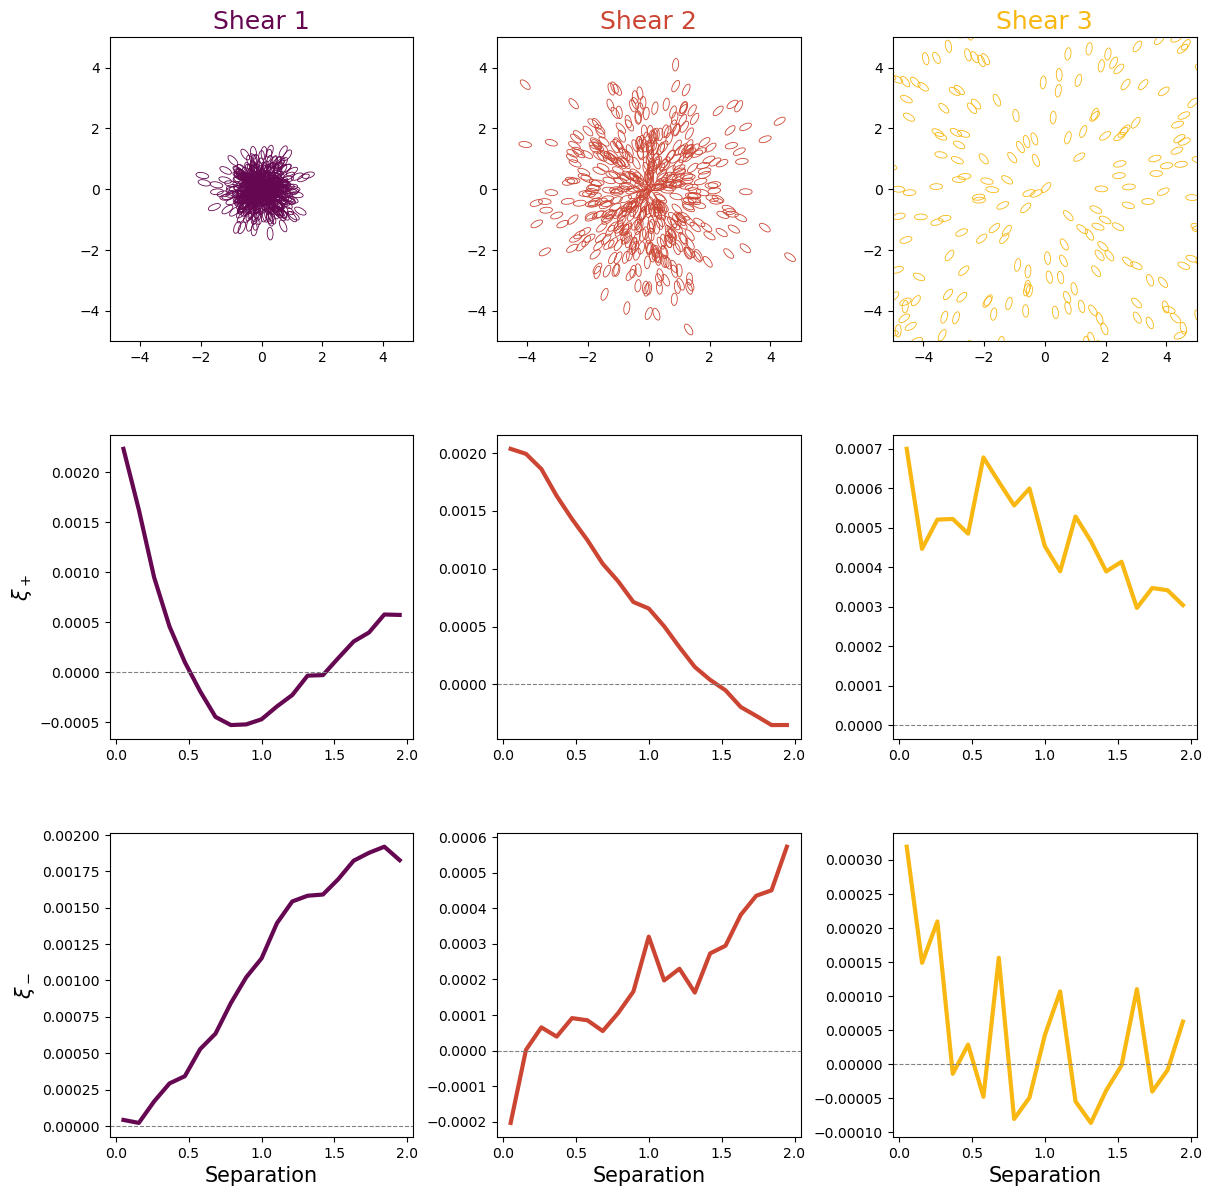

In [17]:
nonzero_shear = 2
shears = [(0.0, 0.0), (nonzero_shear, 1.5), (0.0, nonzero_shear*2)]  # Example shears

box_size = 5
xlim_fixed = (-box_size, box_size)
ylim_fixed = (-box_size, box_size)
bins = np.linspace(0, 2.0, 20)
colors = cmr.take_cmap_colors('cmr.pride_r', len(points), cmap_range=(0.1, 0.45), return_fmt='hex')
lw = 3
labelsize = 15
style = "ellipse"
mode = "radial"
scale = 0.2
stretch = 2

fig, axs = plt.subplots(3, 3, figsize=(12, 12),
                        constrained_layout=True,
                        gridspec_kw={'wspace': 0.01, 'hspace': 0.01})


for i, (x, y) in enumerate(points):
    color = colors[i]
    e1, e2 = fn.assign_realistic_shear(x, y, center=(0, 0), amplitude=0.05, sigma=4.0,
                             mode=mode, noise_std=0.01)

    # Compute xi+, xi-
    r, etet, exex = fn.compute_tangential_and_cross(x, y, e1, e2)
    r_centers, xi_plus, xi_minus = fn.bin_2pcf(r, etet, exex, bins)

    # Top row: Shape field
    ps.plot_shapes(x, y, e1, e2, axs[0, i], style=style, scale=scale, color=color, stretch=stretch)
    axs[0, i].set_xlim(xlim_fixed)
    axs[0, i].set_ylim(ylim_fixed)
    axs[0, i].set_box_aspect(1)
    axs[0, i].set_title(f"Shear {i+1}", color=color, fontsize=labelsize + 3)

    # Middle row: xi+
    axs[1, i].plot(r_centers, xi_plus, color=color, lw=lw)
    axs[1, i].set_ylabel(r"$\xi_+$", fontsize=labelsize)
    axs[1, i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axs[1, i].set_box_aspect(1)

    # Bottom row: xi-
    axs[2, i].plot(r_centers, xi_minus, color=color, lw=lw)
    axs[2, i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axs[2, i].set_ylabel(r"$\xi_-$", fontsize=labelsize)
    axs[2, i].set_xlabel("Separation", fontsize=labelsize)
    axs[2, i].set_box_aspect(1)

    # Remove redundant labels for 2nd/3rd column
    if i > 0:
        axs[0, i].set_ylabel("")
        axs[1, i].set_ylabel("")
        axs[2, i].set_ylabel("")


plt.savefig(f"plots_output/xi_shear_configs_realistic_{mode}_{style}.png", dpi=300, bbox_inches='tight')
plt.show()
